<a href="https://colab.research.google.com/github/swarthyPig/Raspberry-Pi_DHT22_Weather_Station_with_correlation-and-ML/blob/master/machine%20learning/Multi_Variable_ML_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

data = read_csv('iot_data.csv', sep=',')

#data = np.array(data, dtype=np.float32)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
Unnamed: 0     161 non-null int64
temperature    161 non-null float64
humidity       161 non-null float64
cr             161 non-null float64
dtypes: float64(3), int64(1)
memory usage: 5.1 KB


In [0]:
data.head(5)

,Unnamed: 0,temperature,humidity,cr
0,301491,23.30,52.20,4.0
1,301492,22.55,50.60,5.0
2,301493,23.10,50.50,4.0
3,301494,21.90,53.45,5.0
4,301495,21.90,53.50,5.0


In [0]:
df = data.iloc[:,1:]
df.head()

,temperature,humidity,cr
0,23.30,52.20,4.0
1,22.55,50.60,5.0
2,23.10,50.50,4.0
3,21.90,53.45,5.0
4,21.90,53.50,5.0


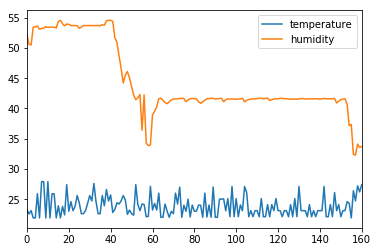

In [0]:
df[['temperature','humidity']].plot()

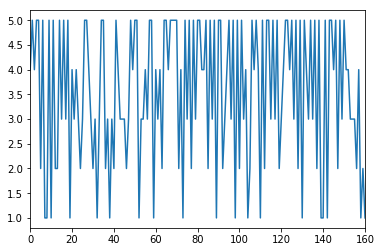

In [0]:
df['cr'].plot()

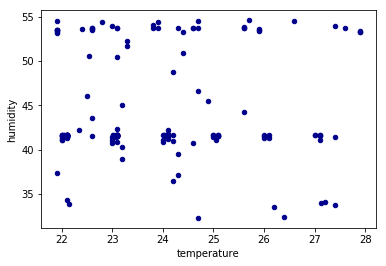

In [0]:
df.plot.scatter(x='temperature', y='humidity', c='DarkBlue')

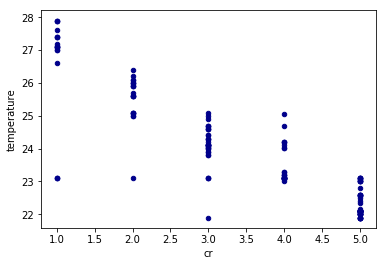

In [0]:
df.plot.scatter(x='cr', y='temperature', c='DarkBlue')

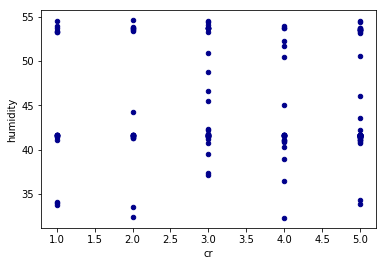

In [0]:
df.plot.scatter(x='cr', y='humidity', c='DarkBlue')

***

### Split data into train and test

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['temperature','humidity']], df['cr'], 
                                                    test_size=0.3, random_state=0)

## ML LR model

### Check parameters of model

- W: W[0], W[1]
- b

> predicted CR = W[0] * T + W[1] * H + b


In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
y_predict = model.predict(X_train) 
score = r2_score(y_train, y_predict)
#score = mean_squared_error(y_train, y_predict) 
#score = np.sqrt(mean_squared_error(y_train, y_predict))
#score = estimator.score(x_train, y_train) #내부에서 predict 
print(score) #1.0

NameError: ignored

In [0]:
y_predict = model.predict(X_test) 
score = r2_score(y_test, y_predict)
#score = mean_squared_error(y_test, y_predict) 
#score = np.sqrt(mean_squared_error(y_test, y_predict)) 
#score = estimator.score(x_test, y_test)
print(score) #1.0

0.9112236894453414


In [0]:
# 선형 회기 모델의 정확도(R^2)

print("트레인 세트의 정확도: {:.2f}".format(model.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.2f}".format(model.score(X_test, y_test)))

트레인 세트의 정확도: 0.74
테스트 세트의 정확도: 0.91


## Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
log_clf.score(X_test, y_test)

0.7142857142857143

In [0]:
log_clf.predict(X_test),y_test

(array([5., 5., 5., 1., 3., 5., 5., 3., 1., 5., 5., 3., 5., 1., 1., 4., 5.,
        5., 5., 5., 3., 3., 1., 1., 3., 3., 5., 3., 1., 5., 5., 2., 5., 5.,
        1., 5., 5., 5., 4., 5., 2., 5., 1., 5., 3., 5., 3., 5., 3.]),
 111    5.0
 113    5.0
 144    5.0
 7      1.0
 44     3.0
 106    5.0
 123    5.0
 66     4.0
 85     2.0
 86     5.0
 134    5.0
 92     2.0
 26     5.0
 147    2.0
 159    2.0
 62     4.0
 51     5.0
 97     5.0
 129    5.0
 90     5.0
 45     3.0
 56     3.0
 59     1.0
 8      1.0
 37     3.0
 33     3.0
 148    5.0
 61     3.0
 98     1.0
 122    5.0
 136    5.0
 24     2.0
 54     3.0
 80     5.0
 19     1.0
 74     5.0
 132    4.0
 16     5.0
 60     4.0
 120    3.0
 40     2.0
 22     4.0
 63     2.0
 152    4.0
 112    2.0
 146    5.0
 100    2.0
 27     5.0
 119    2.0
 Name: cr, dtype: float64)

In [0]:
# 로지스틱 회기 모델의 정확도(R^2)

print("트레인 세트의 정확도: {:.2f}".format(log_clf.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.2f}".format(log_clf.score(X_test, y_test)))

트레인 세트의 정확도: 0.71
테스트 세트의 정확도: 0.71


In [0]:
log_clf.coef_,log_clf.intercept_

(array([[ 1.65728969, -0.03115724],
        [ 1.19671072,  0.03061557],
        [ 0.31309983,  0.02833144],
        [-0.32642968, -0.02258204],
        [-2.84067054, -0.00520551]]),
 array([-39.22732417, -30.24251557,  -7.51091871,   9.69594284,
         67.28481561]))

In [0]:
import json

In [0]:
# serialize coefficients (imitate loading from storage)
encoded = json.dumps((log_clf.coef_.tolist(), log_clf.intercept_.tolist(), log_clf.penalty, log_clf.C))
print(encoded)

[[[1.6572896933860282, -0.031157237419954267], [1.196710724233508, 0.030615571884596158], [0.31309983405922104, 0.028331439442539824], [-0.3264296809209939, -0.02258204194709375], [-2.8406705415862694, -0.005205513442119773]], [-39.227324174843645, -30.24251556911206, -7.510918706939839, 9.69594284465319, 67.28481560668303], "l2", 1.0]


### Save model (Logistic regression)

In [0]:
from sklearn.externals import joblib
# save the model to disk
filename = 'logi_model.sav'
joblib.dump(log_clf, filename)
 

['logi_model.sav']

### How to use parameters of logistic regression

In [0]:
X_test.shape, X_test.iloc[0][0],X_test.iloc[0][1],X_test.iloc[0]

((49, 2), 22.1, 41.67, temperature    22.10
 humidity       41.67
 Name: 111, dtype: float64)

In [0]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# sigmoid(X_test * log_clf.coef_ + log_clf.intercept_).ravel()

In [0]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [0]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 8))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [0]:
# Parameters of data
LABELS = ["1", 
          "2", 
          "3", 
          "4",
          "5"]


--- Confusion matrix for test data ---



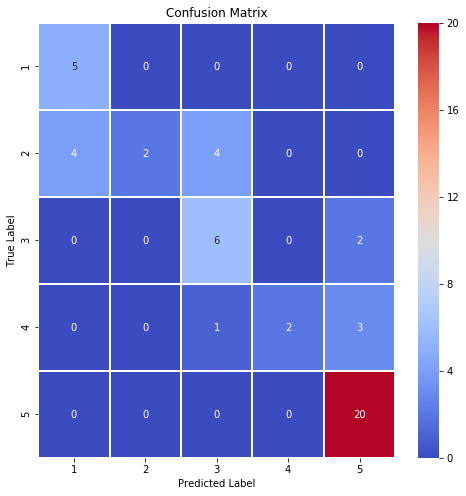



--- Classification report for test data ---

              precision    recall  f1-score   support

         1.0       0.56      1.00      0.71         5
         2.0       1.00      0.20      0.33        10
         3.0       0.55      0.75      0.63         8
         4.0       1.00      0.33      0.50         6
         5.0       0.80      1.00      0.89        20

   micro avg       0.71      0.71      0.71        49
   macro avg       0.78      0.66      0.61        49
weighted avg       0.80      0.71      0.67        49



In [0]:
# Confusion matrix for test data
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = log_clf.predict(X_test)
# Take the class with the highest probability from the test predictions


show_confusion_matrix(y_test.values, y_pred_test)

# %%

print("\n\n--- Classification report for test data ---\n")

print(classification_report(y_test.values, y_pred_test))

In [0]:
y_test.values

array([5., 5., 5., 1., 3., 5., 5., 4., 2., 5., 5., 2., 5., 2., 2., 4., 5.,
       5., 5., 5., 3., 3., 1., 1., 3., 3., 5., 3., 1., 5., 5., 2., 3., 5.,
       1., 5., 4., 5., 4., 3., 2., 4., 2., 4., 2., 5., 2., 5., 2.])

In [0]:
y_pred_test

array([5., 5., 5., 1., 3., 5., 5., 3., 1., 5., 5., 3., 5., 1., 1., 4., 5.,
       5., 5., 5., 3., 3., 1., 1., 3., 3., 5., 3., 1., 5., 5., 2., 5., 5.,
       1., 5., 5., 5., 4., 5., 2., 5., 1., 5., 3., 5., 3., 5., 3.])